# Spring 2025

# Author : Sagar Bhandari






#1.Problem
With this Machine Learning Experiment, my goal is to predict whether a celestial object observed by Sloan Digital Sky Survey DR17 is a **STAR**, **GALAXY** or a **QUASAR**.

I found this dataset [Stellar Classification](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) ''Stellar Classification Dataset - SDSS17'' in kaggle and is publicly available.

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.


| Feature | Description |
|----------|--------------|
| **obj_ID** | Unique object identifier used in the SDSS image catalog (CAS). |
| **alpha** | Right Ascension (RA) angle, measured in degrees (J2000 epoch). |
| **delta** | Declination (Dec) angle, measured in degrees (J2000 epoch). |
| **u** | Ultraviolet (UV) magnitude in the SDSS photometric system. |
| **g** | Green magnitude in the SDSS photometric system. |
| **r** | Red magnitude in the SDSS photometric system. |
| **i** | Near-infrared magnitude in the SDSS photometric system. |
| **z** | Infrared magnitude in the SDSS photometric system. |
| **run_ID** | Identifier for the specific imaging run used to collect the observation. |
| **rerun_ID** | Identifier specifying how the image was processed or reprocessed. |
| **cam_col** | Camera column number identifying the scan line within a run. |
| **field_ID** | Field number identifying each individual field in a run. |
| **spec_obj_ID** | Unique ID for spectroscopic objects; objects sharing this ID have the same classification. |
| **class** | Object classification: **Galaxy**, **Star**, or **Quasar (QSO)**. |
| **redshift** | Redshift value, indicating how much the wavelength of light has been stretched by cosmic expansion. |
| **plate** | Plate ID, identifying the spectroscopic plate used for observation. |
| **MJD** | Modified Julian Date — the date when the observation was taken. |
| **fiber_ID** | Fiber ID, identifying the optical fiber that collected the light for this observation. |


Since, we are trying to predict whether an observation corresponds to a galaxy, star, or quasar, this is a **CLASSIFICATION PROBLEM**

I am planning to implement 8 experiments covering k-Nearest Neighbors, Weighted kNN, Decision Tree, and Random Forest, using both normalized and unnormalized data.

I expect that for kNN and Weighted kNN, normalization will have a noticeable impact on performance since these algorithms rely on distance calculations, and features on different scales can dominate the results. So, after Normalisation, all the features will be brought down on the same scale, so , improving in result.

For Decision Tree and Random Forest, normalization is generally optional because these models split data based on feature thresholds, which aren't affected by the scale of the features.So, I am expecting to see liitle to no improvement in result even after normalization.

This setup will allow me to directly compare how normalization influences each model and see where it really matters.

I'll use accuracy to get an overall sense of how often the model is right, and a confusion matrix to break down performance by class and see where it's making mistakes.

In addition to these , I will try to test  and plot values for 'k' and see whats the best value for our dataset.

#2.Data Preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
# some Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [3]:
#data load

stellar_df=pd.read_csv('/content/drive/MyDrive/CS167/datasets/stellar.csv',)

stellar_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
stellar_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
stellar_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
#check for any NaN
stellar_df.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [7]:
# any duplicate entries ?


print("Duplicate rows:", stellar_df.duplicated().sum())

Duplicate rows: 0


I got lucky with this dataset , kudos to author , this doesnot have any duplicate entries neither NaN entries. This is already clean.

However, There are 18 total features including 1 Class itself . From description of dataset, My goal  is to predict the class (GALAXY, STAR, or QSO) based on the physical and photometric characteristics of each object, so , I will be dropping the following columns as they are primarily identifiers or metadata and do not contribute meaningful information to the classification task:

['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'fiber_ID', 'MJD'].


I will retain the following columns for modeling:
['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']

Additional Note: alpha (Right Ascension) and delta (Declination) are astrometric coordinates , basically the sky's latitude and longitude. They tell you where an object is, not what it is. I'm keeping them in for now in case spatial patterns add a bit of signal, but I don't expect them to have a big impact on the classifier.


[Right Ascension(alpha)](https://www.google.com/search?q=Right+Ascension+angle+(at+J2000+epoch)&oq=Right+Ascension+angle+(at+J2000+epoch)&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIKCAEQABgKGBYYHjINCAIQABiGAxiABBiKBTINCAMQABiGAxiABBiKBTINCAQQABiGAxiABBiKBTIHCAUQABjvBTIHCAYQABjvBdIBBzE3MGowajeoAgCwAgA&sourceid=chrome&ie=UTF-8)

[Declination angle(delta)](https://www.google.com/search?q=delta+%3D+Declination+angle+(at+J2000+epoch)&oq=delta+%3D+Declination+angle+(at+J2000+epoch)&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigATIHCAUQIRigAdIBBzQ4NGowajeoAgCwAgA&sourceid=chrome&ie=UTF-8)

In [8]:
#drop

stellar_df = stellar_df.drop([
    'obj_ID', 'run_ID', 'rerun_ID', 'field_ID',
    'spec_obj_ID', 'plate', 'fiber_ID', 'MJD', 'cam_col'
], axis=1)


In [9]:
stellar_df.head()


,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [10]:
stellar_df.shape


(100000, 9)

Awesome , now we have 8 feature columns and 1 target column.

In [11]:
# split the train and test data (8:2)
target = 'class'
predictors = stellar_df.columns.drop(target)

train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_df[predictors],
    stellar_df[target],
    test_size=0.2,
    random_state=41
)



In [12]:
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)
print('train_sln shape:', train_sln.shape)
print('test_sln shape:', test_sln.shape)

train_data shape: (80000, 8)
test_data shape: (20000, 8)
train_sln shape: (80000,)
test_sln shape: (20000,)


 kNN (Unweighted) Results:
Accuracy: 0.83165

Confusion Matrix:
 [[11371   187   357]
 [  589  3075   151]
 [ 1776   307  2187]]


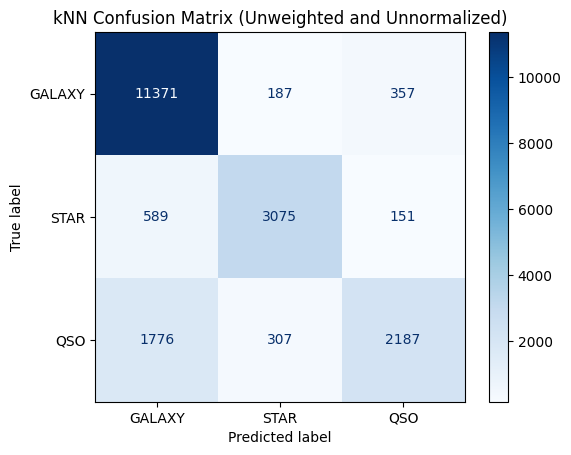

In [18]:
# 1.  kNN (unweighted and unnormalized)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_data, train_sln)
y_pred_knn = knn.predict(test_data)

print(" kNN (Unweighted) Results:")
print("Accuracy:", accuracy_score(test_sln, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(test_sln, y_pred_knn))

#for fig. plotting

stellar_labels = ['GALAXY', 'STAR', 'QSO' ]
conf_mat = confusion_matrix(test_sln, y_pred_knn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("kNN Confusion Matrix (Unweighted and Unnormalized)")
plt.show()


##Interpreting Confusion Matrix . This  is 3*3 matrix .


GALAXY (row 0)
11,335 correctly classified

Misclassified as STAR: 206; as QSO: 349


STAR (row 1)
3,003 correctly classified

Misclassified as GALAXY: 561; as QSO: 163


QSO (row 2)
2,262 correctly classified

Misclassified as GALAXY: 1,794; as STAR: 327


In [ ]:
# finding the best K value for kNN (unweighted and unnormalized)

# Define k values to test
k_vals = [1,2,3,4,5,6,7,9,15,21]
kNN_accuracies = []

# Loop through k values
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_sln)           # train on training data
    y_pred = knn.predict(test_data)          # predict on test data
    current_accuracy = accuracy_score(test_sln, y_pred)
    kNN_accuracies.append(current_accuracy)
    print(f"k = {k}: Accuracy = {current_accuracy:.4f}")


# Plot k vs accuracy
plt.figure(figsize=(8,5))
plt.plot(k_vals, kNN_accuracies, 'ro-', label='k-NN')
plt.title('k-NN (Unweighted, Unnormalized) Accuracy vs k', fontsize=16)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

k = 1: Accuracy = 0.8293
k = 2: Accuracy = 0.8232
k = 3: Accuracy = 0.8360
k = 4: Accuracy = 0.8317
k = 5: Accuracy = 0.8339
k = 6: Accuracy = 0.8288
k = 7: Accuracy = 0.8306


Best I could get is k = 3: Accuracy = 0.8360

 kNN (Weighted) Results:
Accuracy: 0.8462

Confusion Matrix:
 [[11105   221   589]
 [  465  3156   194]
 [ 1383   224  2663]]


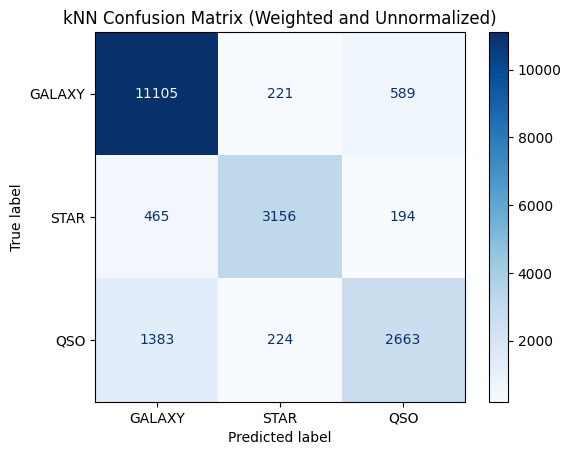

In [21]:
# 2.  kNN (weighted and unnormalized)

knn = KNeighborsClassifier(n_neighbors=4,weights='distance')
knn.fit(train_data, train_sln)
y_pred_knn = knn.predict(test_data)

print(" kNN (Weighted) Results:")
print("Accuracy:", accuracy_score(test_sln, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(test_sln, y_pred_knn))


#for fig. plotting

stellar_labels = ['GALAXY', 'STAR', 'QSO' ]
conf_mat = confusion_matrix(test_sln, y_pred_knn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("kNN Confusion Matrix (Weighted and Unnormalized)")
plt.show()



k = 1: Accuracy = 0.8293
k = 2: Accuracy = 0.8293
k = 3: Accuracy = 0.8400
k = 4: Accuracy = 0.8462
k = 5: Accuracy = 0.8438
k = 6: Accuracy = 0.8416
k = 7: Accuracy = 0.8407
k = 9: Accuracy = 0.8373
k = 15: Accuracy = 0.8276
k = 21: Accuracy = 0.8196


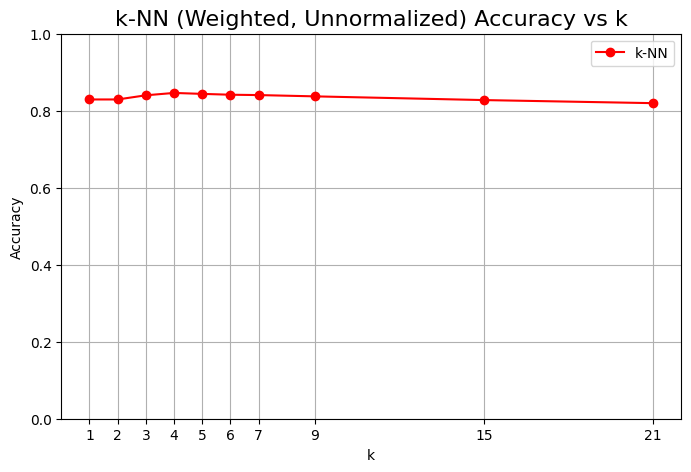

In [ ]:
# finding the best K value for kNN (weighted and unnormalized)

# Define k values to test
k_vals = [1,2,3,4,5,6,7,9,15,21]
kNN_accuracies = []

# Loop through k values
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(train_data, train_sln)           # train on training data
    y_pred = knn.predict(test_data)          # predict on test data
    current_accuracy = accuracy_score(test_sln, y_pred)
    kNN_accuracies.append(current_accuracy)
    print(f"k = {k}: Accuracy = {current_accuracy:.4f}")


# Plot k vs accuracy
plt.figure(figsize=(8,5))
plt.plot(k_vals, kNN_accuracies, 'ro-', label='k-NN')
plt.title('k-NN (Weighted, Unnormalized) Accuracy vs k', fontsize=16)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

Best i could get is k = 4: Accuracy = 0.8462.

On the unnormalized data, weighted kNN performed best, hitting 0.846 accuracy at k=4 and slightly more than  the unweighted version, which reached 0.836 at k=3. Both models did well overall, but the small gain suggests distance based weighting helps.

Decision Tree (Unnormalized) Accuracy: 0.9628
___PREDICTED___ 	  ___ACTUAL___
STAR 		 STAR
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
QSO 		 QSO
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
-------------------------------------------------------
        GALAXY  STAR   QSO
GALAXY   11529    19   367
STAR        15  4254     1
QSO        342     0  3473


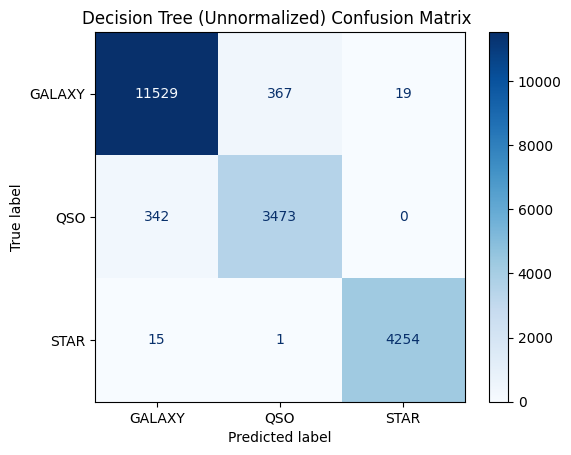

In [42]:
# 3. Decision Tree (unnormalized)


#REFRENCE: CS167Fall2025/Day11_Introduction_to_Scikit_Learn.ipynb.  https://github.com/urness/CS167Fall2025/blob/main/Day11_Introduction_to_Scikit_Learn.ipynb

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"
train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_df[predictors], stellar_df[target], test_size=0.2, random_state=41
)

# . Create classifier object
dt = tree.DecisionTreeClassifier(random_state=41)

# . Fit the model
dt.fit(train_data, train_sln)

# . Predict
dt_predictions = dt.predict(test_data)

# . Measure performance
print("Decision Tree (Unnormalized) Accuracy:", metrics.accuracy_score(test_sln, dt_predictions))

# Optional: Show first few actual vs predicted
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(10):
    print(dt_predictions[i], "\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")

# Confusion matrix using string labels
stellar_labels = ['GALAXY', 'STAR', 'QSO']
conf_mat = metrics.confusion_matrix(test_sln, dt_predictions, labels=stellar_labels)
print(pd.DataFrame(conf_mat, index=stellar_labels, columns=stellar_labels))

#for fig. plotting

stellar_labels = ['GALAXY', 'QSO', 'STAR' ]
conf_mat = confusion_matrix(test_sln, dt_predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree (Unnormalized) Confusion Matrix ")
plt.show()


Decision Tree (Unnormalized) Accuracy: 0.9628

I am not surprised that the Decision Tree did much better than kNN on the raw data. The kNN model gets easily thrown off when features have different scales, because its whole method is based on calculating distance. But a Decision Tree doesn't care about the scale; it just looks for the best place to split the data, like asking 'is the redshift greater than 0.5?', which works just as well on unscaled data.

##Can I fine tune this model further ?






max_depth = 1: Accuracy = 0.8041
max_depth = 6: Accuracy = 0.9681
max_depth = 5: Accuracy = 0.9651
max_depth = 9: Accuracy = 0.9740
max_depth = 10: Accuracy = 0.9743
max_depth = 11: Accuracy = 0.9746
max_depth = 12: Accuracy = 0.9737
max_depth = 13: Accuracy = 0.9728
max_depth = 14: Accuracy = 0.9718
max_depth = 15: Accuracy = 0.9718
max_depth = 16: Accuracy = 0.9707
max_depth = 17: Accuracy = 0.9702
max_depth = 20: Accuracy = 0.9691


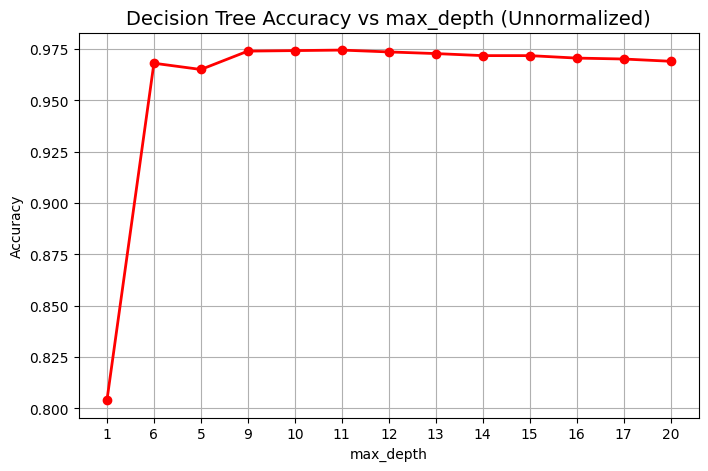

In [ ]:
# Decision Tree (Unnormalized) - Experimenting with max_depth

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"

train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_df[predictors], stellar_df[target], test_size=0.2, random_state=41
)

# Define list of max_depth values to test
D = [1, 6,5, 9,10,11,12,13,14, 15,16,17, 20]

# Store accuracy for each depth
depth_accuracies = []

for depth in D:
    # . Create classifier object
    dt = tree.DecisionTreeClassifier(
        random_state=41,
        max_depth=depth,
        min_samples_leaf=5,    # keeping fixed
        criterion='entropy'
    )

    # . Fit the model
    dt.fit(train_data, train_sln)

    # . Predict
    dt_predictions = dt.predict(test_data)

    # . Measure performance
    acc = metrics.accuracy_score(test_sln, dt_predictions)
    depth_accuracies.append(acc)

    print(f"max_depth = {depth}: Accuracy = {acc:.4f}")

# plot out  accuracy vs max_depth
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot([str(d) for d in D], depth_accuracies, 'ro-', linewidth=2)
plt.title("Decision Tree Accuracy vs max_depth (Unnormalized)", fontsize=14)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Slightly improved our result.

max_depth = 11: Accuracy = 0.9746


min_samples_leaf = 1: Accuracy = 0.9692
min_samples_leaf = 10: Accuracy = 0.9726
min_samples_leaf = 20: Accuracy = 0.9756
min_samples_leaf = 25: Accuracy = 0.9759
min_samples_leaf = 30: Accuracy = 0.9760
min_samples_leaf = 31: Accuracy = 0.9759
min_samples_leaf = 32: Accuracy = 0.9758
min_samples_leaf = 33: Accuracy = 0.9754
min_samples_leaf = 35: Accuracy = 0.9749
min_samples_leaf = 40: Accuracy = 0.9752
min_samples_leaf = 50: Accuracy = 0.9750


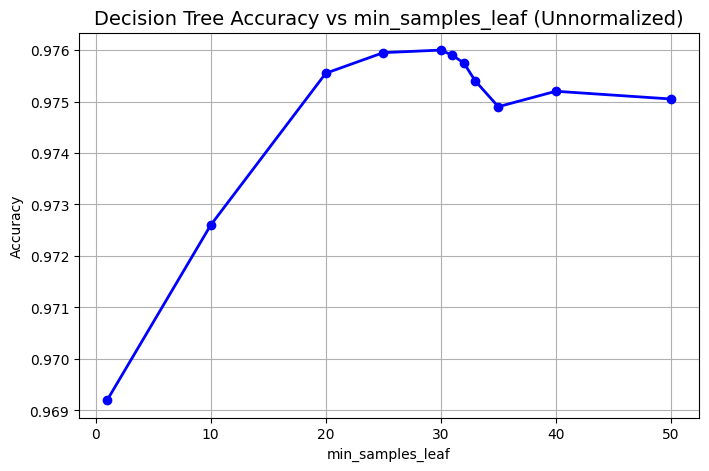

In [ ]:
# 3. Decision Tree (Unnormalized) - Experimenting with min_samples_leaf

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"

train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_df[predictors], stellar_df[target], test_size=0.2, random_state=41
)

# Define list of min_samples_leaf values to test
leaf_values = [1, 10, 20,25,30,31,32,33,35,40, 50]

# Store accuracy for each min_samples_leaf
leaf_accuracies = []

# Optional: keep max_depth fixed while testing leaf size
fixed_max_depth = 15

for leaf in leaf_values:
    # . Create classifier object
    dt = tree.DecisionTreeClassifier(
        random_state=41,
        max_depth=fixed_max_depth,
        min_samples_leaf=leaf,
        criterion='entropy'
    )

    # . Fit the model
    dt.fit(train_data, train_sln)

    # . Predict
    dt_predictions = dt.predict(test_data)

    # . Measure performance
    acc = metrics.accuracy_score(test_sln, dt_predictions)
    leaf_accuracies.append(acc)

    print(f"min_samples_leaf = {leaf}: Accuracy = {acc:.4f}")

# Optional: visualize accuracy vs min_samples_leaf
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(leaf_values, leaf_accuracies, 'bo-', linewidth=2)
plt.title("Decision Tree Accuracy vs min_samples_leaf (Unnormalized)", fontsize=14)
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Best RESULT from Decision Tree.

`min_samples_leaf = 30: Accuracy = 0.9760`

Random Forest (Unnormalized) Accuracy: 0.97765
___PREDICTED___ 	  ___ACTUAL___
STAR 		 STAR
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
QSO 		 QSO
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
-------------------------------------------------------
        GALAXY  STAR   QSO
GALAXY   11742    35   138
STAR         1  4269     0
QSO        273     0  3542


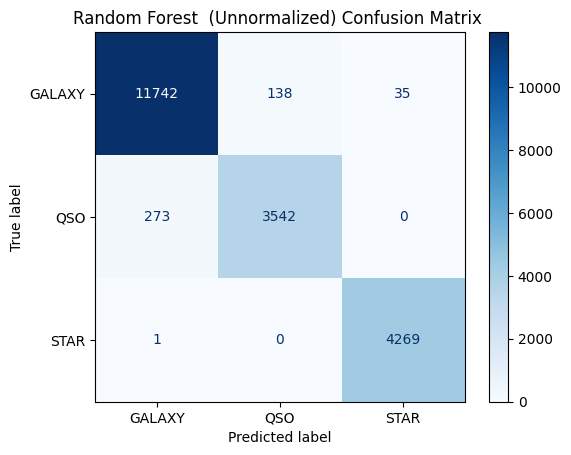

In [27]:
#4. Random Forest unnormalized

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"

# Split the data
train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_df[predictors], stellar_df[target], test_size=0.2, random_state=41
)

# . Create Random Forest classifier object
rf = RandomForestClassifier()

# . Fit the model
rf.fit(train_data, train_sln)

# . Predict
rf_predictions = rf.predict(test_data)

# . Measure performance
print("Random Forest (Unnormalized) Accuracy:", metrics.accuracy_score(test_sln, rf_predictions))

# Optional: Show first few actual vs predicted
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(10):
    print(rf_predictions[i], "\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")

# Confusion matrix using string labels
stellar_labels = ['GALAXY', 'STAR', 'QSO']
conf_mat_rf = metrics.confusion_matrix(test_sln, rf_predictions, labels=stellar_labels)
print(pd.DataFrame(conf_mat_rf, index=stellar_labels, columns=stellar_labels))


#for fig. plotting

stellar_labels = ['GALAXY', 'QSO', 'STAR' ]
conf_mat = confusion_matrix(test_sln, rf_predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest  (Unnormalized) Confusion Matrix ")
plt.show()

##Lets tune this model

n_estimators = 1: Accuracy = 0.9524
n_estimators = 2: Accuracy = 0.9615
n_estimators = 3: Accuracy = 0.9717
n_estimators = 4: Accuracy = 0.9727
n_estimators = 5: Accuracy = 0.9752
n_estimators = 6: Accuracy = 0.9762
n_estimators = 7: Accuracy = 0.9764
n_estimators = 8: Accuracy = 0.9764
n_estimators = 9: Accuracy = 0.9758
n_estimators = 10: Accuracy = 0.9761
n_estimators = 11: Accuracy = 0.9761
n_estimators = 12: Accuracy = 0.9767
n_estimators = 13: Accuracy = 0.9767
n_estimators = 14: Accuracy = 0.9763
n_estimators = 15: Accuracy = 0.9769
n_estimators = 16: Accuracy = 0.9766
n_estimators = 17: Accuracy = 0.9768
n_estimators = 18: Accuracy = 0.9766
n_estimators = 19: Accuracy = 0.9769


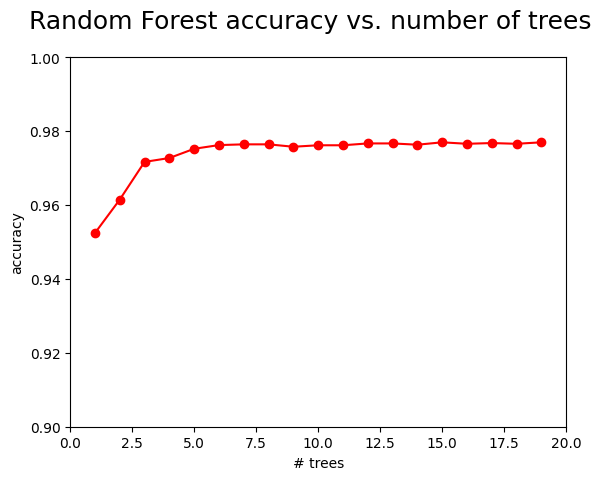

In [ ]:
# This CODE CREDIT: https://github.com/urness/CS167Fall2025/blob/main/Day13_Random_Forests.ipynb

def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)
        print(f"n_estimators = {n}: Accuracy = {curr_accuracy:.4f}")


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.9,1])

    plt.show()

tune_number_of_trees(range(1,20))

max_features = 1: Accuracy = 0.9720
max_features = 2: Accuracy = 0.9761
max_features = 3: Accuracy = 0.9774
max_features = 4: Accuracy = 0.9771
max_features = 5: Accuracy = 0.9771
max_features = 6: Accuracy = 0.9768
max_features = 7: Accuracy = 0.9768
max_features = 8: Accuracy = 0.9758
max_features = 9: Accuracy = 0.9758
max_features = 10: Accuracy = 0.9758
max_features = 11: Accuracy = 0.9758
max_features = 12: Accuracy = 0.9758
max_features = 13: Accuracy = 0.9758
max_features = 14: Accuracy = 0.9758


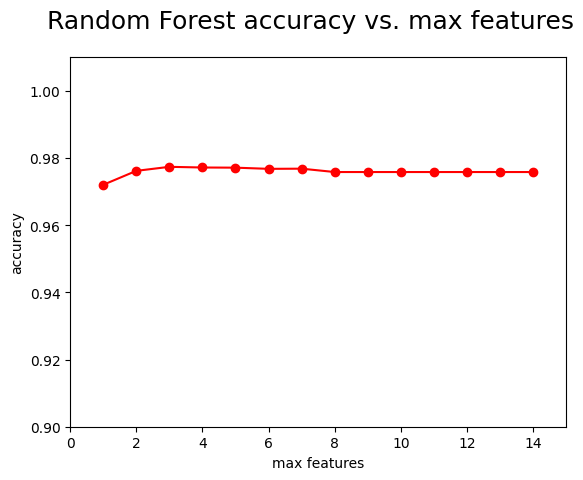

In [ ]:
# This CODE CREDIT: https://github.com/urness/CS167Fall2025/blob/main/Day13_Random_Forests.ipynb

def tune_max_features(max_features_values):
    rf_accuracies = []

    for m in max_features_values:

        curr_rf = RandomForestClassifier(n_estimators=10,max_features=m, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)
        print(f"max_features = {m}: Accuracy = {curr_accuracy:.4f}")


    plt.suptitle('Random Forest accuracy vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,rf_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,.9,1.01])

    plt.show()

tune_max_features(range(1,15))

As i increased number of trees and max features , computation got quite heavy as my data had 100,000 rows. So, it took quite a time to run the code above.

The best result I could get from Random forest (including tuning) is Random Forest (Unnormalized) Accuracy: 0.97765 (got this with default values)





##Quick Summary on accuracy vs model for unnormalized data



| Model                      |       | Accuracy |
|-----------------------------|-----------------------------------|-----------|
| unweighted kNN                        |        | 0.8360   |
| Weighted kNN               |            | 0.8462   |
| Decision Tree (Unnormalized) |             | 0.9760    |
| Random Forest (Unnormalized) |  | 0.97765   |





Random Forest wins  race here for unnormalized data.

##Now time for with NORMALIZED DATA

kNN (Unweighted, Normalized) Results:
Accuracy: 0.9406

Confusion Matrix:
         GALAXY  STAR   QSO
GALAXY   11542   103   270
STAR       445  3360    10
QSO        360     0  3910


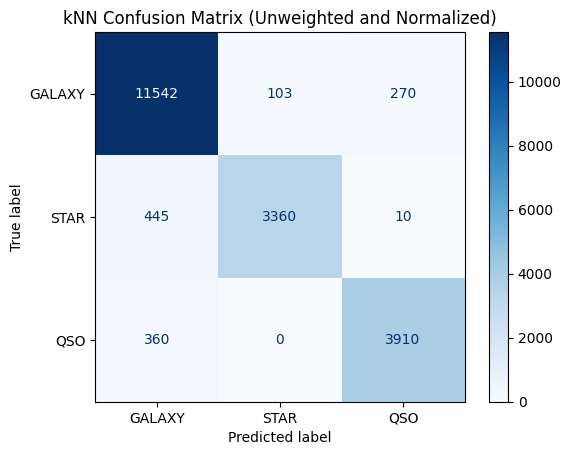

In [29]:
#5.  kNN unweighted and Normalized

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"

scaler = StandardScaler() #normalize
stellar_norm_df = stellar_df.copy()
stellar_norm_df[predictors] = scaler.fit_transform(stellar_norm_df[predictors])

# 2. Split data
train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_norm_df[predictors], stellar_norm_df[target],
    test_size=0.2, random_state=41
)

# 3. Training  unweighted kNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_data, train_sln)
y_pred_knn = knn.predict(test_data)


print("kNN (Unweighted, Normalized) Results:")
print("Accuracy:", accuracy_score(test_sln, y_pred_knn))
print("\nConfusion Matrix:\n", pd.DataFrame(
    confusion_matrix(test_sln, y_pred_knn),
    index=['GALAXY', 'STAR', 'QSO'],
    columns=['GALAXY', 'STAR', 'QSO']
))


#for fig. plotting

stellar_labels = ['GALAXY', 'STAR','QSO' ]
conf_mat = confusion_matrix(test_sln, y_pred_knn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("kNN Confusion Matrix (Unweighted and Normalized)")
plt.show()

WOAH, this is significantly better result, specially talking about QSO. With unnormalized , it was predicitng QSO Misclassified as GALAXY: 1,794.   It got down to 360 this time with Normalization

k = 1: Accuracy = 0.9346
k = 2: Accuracy = 0.9282
k = 3: Accuracy = 0.9449
k = 4: Accuracy = 0.9406
k = 5: Accuracy = 0.9443
k = 6: Accuracy = 0.9396
k = 7: Accuracy = 0.9422
k = 9: Accuracy = 0.9403
k = 15: Accuracy = 0.9368
k = 21: Accuracy = 0.9325


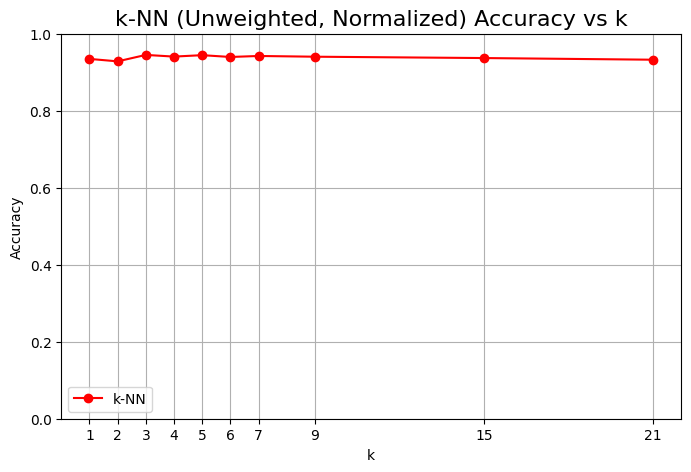

In [ ]:
# Finding the best K value for kNN (Unweighted and Normalized)

# Define k values to test
k_vals = [1, 2, 3, 4, 5, 6, 7, 9, 15, 21]
kNN_accuracies = []

# Loop through k values
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_sln)
    y_pred = knn.predict(test_data)
    current_accuracy = accuracy_score(test_sln, y_pred)
    kNN_accuracies.append(current_accuracy)
    print(f"k = {k}: Accuracy = {current_accuracy:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(8,5))
plt.plot(k_vals, kNN_accuracies, 'ro-', label='k-NN')
plt.title('k-NN (Unweighted, Normalized) Accuracy vs k', fontsize=16)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()


Best Unweighted Normalized kNN : k = 3: Accuracy = 0.9449





k = 1: Accuracy = 0.9346
k = 2: Accuracy = 0.9346
k = 3: Accuracy = 0.9447
k = 4: Accuracy = 0.9458
k = 5: Accuracy = 0.9454
k = 6: Accuracy = 0.9443
k = 7: Accuracy = 0.9434
k = 9: Accuracy = 0.9423
k = 15: Accuracy = 0.9405
k = 21: Accuracy = 0.9382


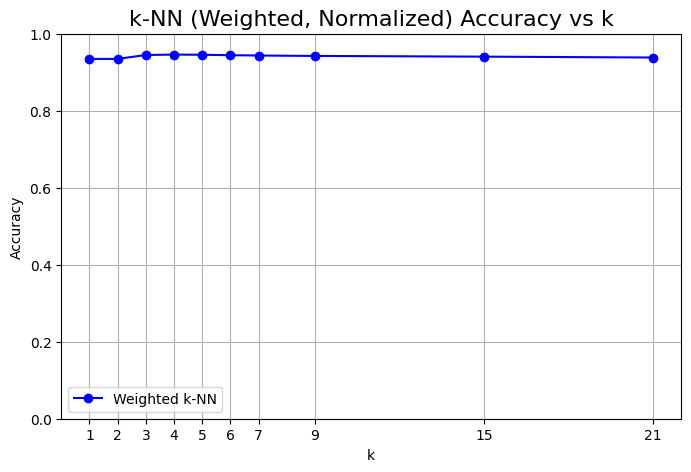

In [31]:
#6. kNN weighted and Normalized

# i will skip the default k , and directly jump to see best k ,

# Finding the best K value for kNN (Weighted and Normalized)


k_vals = [1, 2, 3, 4, 5, 6, 7, 9, 15, 21]
kNN_accuracies = []

# Using Loop,  through k values
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(train_data, train_sln)           # Train on training data
    y_pred = knn.predict(test_data)          # Predict on test data
    current_accuracy = accuracy_score(test_sln, y_pred)
    kNN_accuracies.append(current_accuracy)
    print(f"k = {k}: Accuracy = {current_accuracy:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(8,5))
plt.plot(k_vals, kNN_accuracies, 'bo-', label='Weighted k-NN')
plt.title('k-NN (Weighted, Normalized) Accuracy vs k', fontsize=16)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()





Best Weighted Normalized kNN : k = 4: Accuracy = 0.9458


Decision Tree (Normalized) Accuracy: 0.963
___PREDICTED___ 	  ___ACTUAL___
STAR 		 STAR
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
QSO 		 QSO
GALAXY 		 GALAXY
GALAXY 		 GALAXY
GALAXY 		 GALAXY
-------------------------------------------------------
        GALAXY  STAR   QSO
GALAXY   11524    19   372
STAR        13  4254     3
QSO        333     0  3482


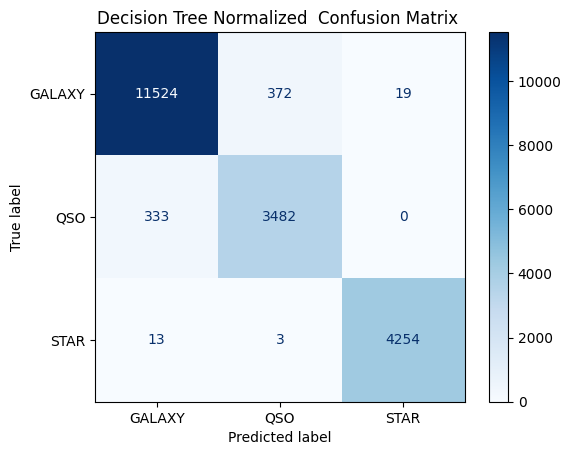

In [33]:
# 7. Decision Tree (Normalized)

# REFRENCE: CS167Fall2025/Day11_Introduction_to_Scikit_Learn.ipynb
# https://github.com/urness/CS167Fall2025/blob/main/Day11_Introduction_to_Scikit_Learn.ipynb

predictors = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = "class"

# Split normalized data
train_data, test_data, train_sln, test_sln = train_test_split(
    stellar_norm_df[predictors],
    stellar_norm_df[target],
    test_size=0.2,
    random_state=41
)

# Decision Tree classifier
dt = tree.DecisionTreeClassifier(random_state=41)

# Fit
dt.fit(train_data, train_sln)

# Predict
dt_predictions = dt.predict(test_data)

# Evaluate performance
print("Decision Tree (Normalized) Accuracy:", metrics.accuracy_score(test_sln, dt_predictions))

# Show few predictions
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(10):
    print(dt_predictions[i], "\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")

# Confusion matrix
stellar_labels = ['GALAXY', 'STAR', 'QSO']
conf_mat = metrics.confusion_matrix(test_sln, dt_predictions, labels=stellar_labels)
print(pd.DataFrame(conf_mat, index=stellar_labels, columns=stellar_labels))

#for fig. plotting

stellar_labels = ['GALAXY', 'QSO','STAR' ]
conf_mat = confusion_matrix(test_sln, dt_predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Normalized  Confusion Matrix ")
plt.show()


Random Forest (Normalized) Results:
Accuracy: 0.9778

Confusion Matrix:
 [[11750   136    29]
 [  278  3537     0]
 [    1     0  4269]]


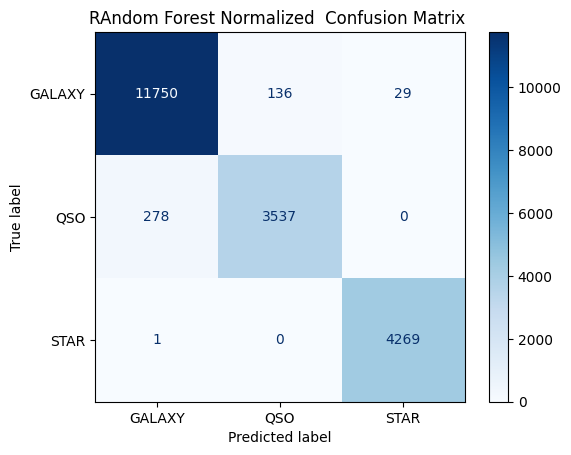

In [37]:
#8. Random Forest (Normalized)

scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train_data)
test_data_norm = scaler.transform(test_data)

#  Forest on normalized data
rf_norm = RandomForestClassifier(random_state=42)
rf_norm.fit(train_data_norm, train_sln)        # use new normalized features
y_pred_rf_norm = rf_norm.predict(test_data_norm)

print("Random Forest (Normalized) Results:")
print("Accuracy:", accuracy_score(test_sln, y_pred_rf_norm))
print("\nConfusion Matrix:\n", confusion_matrix(test_sln, y_pred_rf_norm))


#for fig. plotting

stellar_labels = ['GALAXY', 'QSO','STAR' ]
conf_mat = confusion_matrix(test_sln, y_pred_rf_norm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=stellar_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("RAndom Forest Normalized  Confusion Matrix ")
plt.show()



NOTE:


I did not fine-tune the Decision Tree and Random Forest for the normalized data because normalization is unlikely to have any significant impact on these tree-based models, as they split data based on feature thresholds rather than distances.




##Summary of all the Models

| Model         | Non-Normalized Accuracy | Normalized Accuracy | Parameter / Notes                  |
|---------------|------------------------|-------------------|----------------------------------|
| kNN           | 0.8360                 | 0.9449            | Best k = 3                    |
| w-kNN         | 0.8462                 | 0.9458            | Best k = 4, weighted by distance |
| Decision Tree | 0.9760                 | 0.963            | max_depth=None, min_samples_leaf=5 |
| Random Forest | 0.97765                | 0.9778           | Default Values  |


##Does normalizing your data lead to better performance? If so, why?


Short answer : YES and NO

Explaintaion:
Yes, Normalization can help, but its impact depends on the model. Distance based methods like kNN (including the weighted version) that we used are sensitive to feature scales such that  features with larger numeric range of values  can dominate the distance metric and bias the result. Scaling everything to a same scale range , and  lets each feature contribution to be  fair, which leads to more  accuracy just as we saw , accuracy before vs after normalization for kNN models.

In our SDSS dataset , alpha and delta (astrometric coordinates) are in the hundreds, the photometric magnitudes u, g, r, i, z sit around 15 -  25, and redshift is below 1. Without scaling, kNN would implicitly give alpha and delta much more weight simply because of their size They are overpowering the whole measurement. After normalization, the coordinates, magnitudes, and redshift contribute proportionally, which improves distance  based classification.

Tree based models like Decision Trees and Random Forests are largely scale independent  because they split on value thresholds rather than compute distances, so normalization doesnot meaningfully change their performance. Thats why in our experiments, normalized kNN improved greatly while the tree models stayed roughly the same.

 ## ANALYSIS:
 What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.


The key discovery for me, I would say is, why knowing how a  models work is so important? Having a good idea on how the model works is very essential not only to get good results and success , but also will help to save time by implementing best technique for given model.

Okay, so we have got our final performances of our models ,and its mix  of two different types of models. The biggest 'wow' moment came from the kNN models. Before we normalized the data, they were decent (not as good ) but struggling, especially with Quasars it was mislabeling almost 1,800 of them. But the second we scaled the data on the same scale range ,. The accuracy jumped, and those Quasar misclassifications decreased to just 360 ish . It as  clear that the model was getting completely distracted by the big numbers from the sky coordinates alpha and delta, , and normalization finally let it pay attention to the more important features like redshift and color.

The Decision Tree was already very accurate around 0.976 without normalization and scaling did nott really changed that much. Most of the mistakes were borderline STAR GALAXY cases, and since trees split on thresholds rather than distances, normalization does not affect how they choose splits, so the performance stayed about the same.

Random Forest came out on top at roughly 0.978 without normalization and barely changed after Normalization.. Misclassifications were extremely rare across all classes, which makes sense because an ensemble of trees is naturally robust. For example, even rare QSOs were almost always classified correctly, whic is really good.

Normalization made a big difference for kNN. For unweighted kNN, QSOs misclassified as GALAXY dropped from 1,794 to 360 after normalization. Weighted kNN saw similar improvements and overall accuracy went up . Normalization  helped because kNN relies on distance calculations, and features like u, g, r, i, z,  redshift, delta and alpha  were on very different scales so,  bringing them to the same range made the distances more meaningful.

Overall, tree based models are unlikely  to Normalization, while kNN really benefits from normalization. Photometric magnitudes and redshift carry the strongest predictive signal, and sky coordinates (alpha and delta) add only minor context (i guess)
. Random Forest remains the best overall performer, but a properly scaled knN can come surprisingly close.

## Insights/recommendations

I would reccomend to normalize data while using kNN model. And weighted kNN models could be better that unweighted once.

For , Decision tree and Random forest , it is always best idea to play around with parameter , tweak them , and get the model fine tuned for optimal result.

And yes , always clean data first before making analysis or modeling.


##WINNER ANNOUNCEMENT

Although after Normalization , kNN did pretty good job, and got accuracy of 94%, there was a close call between Desicion tree with 	96% and Random Forest 	97.78%. And the ultimate winner here is **Random Forest**. I tried to push random forest by tuning its parameters , but could not get any further significant improvement.


##We trained our model, why is it sygnificant?

The real success of this project is that we have  created a powerful predictive engine for astronomy. With 97.78% accuracy, our model can now just look at raw observational data from a sky survey  and instantly, with very minimal time  determine if an object is a star, a galaxy, or a quasar. This  empowers us or astronomers to analyze celestial data at an unprecedented scale. As we continue to feed this model more data, its predictive power will only grow, further accelerating the speed of astronomical discovery. Thats why ML is AMAZING.


##Bumps in the road.

Firstly, I was (and I am still ) in dillema if I should consider those sky coordinates "Alpha" and "Delta " as features to predict class. Was including them as feature a good idea ?

In my opinion, may be not.

 **this is just my personal guess**.:

 I think since , they are just coordinates , I could have just got rid of them .

 Anyways I ended up including them them as features.

 But they did not hurt the models, so they might be weak predictor, and rest scientific photometric magnitudes (u, g, r, i, z) and redshift carried most of their importance in model )

 Another thing, that surprised me was accuracy of desicion tree and random forest in just first run. I had inner thought that i might need to tune their params, to get good result , but I got pretty good result in just 1 defult value run.

##Acknowledgements for DATASET


Data files © Original Authors

Collection Methodology
Data Release 17 - images, optical spectra (SDSS/SEGUE/BOSS/SEQUELS/eBOSS), infrared spectra (APOGEE/APOGEE-2), IFU spectra (MaNGA), stellar library spectra (MaStar), and catalog data (parameters measured from images and spectra, such as magnitudes and redshifts).


fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.


The data released by the SDSS is under public domain. Its taken from the current data release RD17.

More information about the license: http://www.sdss.org/science/image-gallery/
SDSS Publications:

Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]